In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

####

Lecture du csv


####

In [2]:
## lecture du csv
df = pd.read_csv("./data/chansons.csv")
df.shape

(7574, 39)

###

39 colonnes... possible/probablement on aura de la colinéarité

Analysons un peu plus

###

In [3]:
df.isnull().sum()

annee                       0
titre                       0
artiste                     0
chansonID                   0
artisteID                   0
signature_temp              0
signature_temp_confiance    0
intensite                   0
tempo                       0
tempo_confiance             0
gamme                       0
gamme_confiance             0
energie                     0
hauteur                     0
timbre_0_min                0
timbre_0_max                0
timbre_1_min                0
timbre_1_max                0
timbre_2_min                0
timbre_2_max                0
timbre_3_min                0
timbre_3_max                0
timbre_4_min                0
timbre_4_max                0
timbre_5_min                0
timbre_5_max                0
timbre_6_min                0
timbre_6_max                0
timbre_7_min                0
timbre_7_max                0
timbre_8_min                0
timbre_8_max                0
timbre_9_min                0
timbre_9_m

###

Pas de nulls à régler

###

In [4]:
## un apperçu des variables
df.head()

,annee,titre,artiste,chansonID,artisteID,signature_temp,signature_temp_confiance,intensite,tempo,tempo_confiance,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [5]:
## Standard scaler. On a des variables dans le 10^0, 10^2. 
## Mieux vaut les mettre à la même échelle
def getScaledDf(pDfX, pScaler = StandardScaler()):
    return pScaler.fit_transform(pDfX)

###

Obtention des dfX (var indépend) et dfY (target, var dépend)


###

In [6]:
## retourne les dataframes X et Y. Par défaut, supprimer les colonnes ID
def getDfXDfY(pDf, pColY, pColsXDrop=['chansonID', 'artisteID']):
    dfY = pd.DataFrame(pDf[pColY], columns = [pColY])
    #print(type(pColsXDrop))
    #print(type(pColY))
    lstColsExcl=[]
    lstColsExcl.extend(pColsXDrop)
    lstColsExcl.append(pColY)
    print(lstColsExcl)
    dfX = pDf.drop(lstColsExcl, axis=1)
    return dfX, dfY

In [7]:
dfX, dfY = getDfXDfY(df, 'Top10')

['chansonID', 'artisteID', 'Top10']


In [8]:
dfX.dtypes

annee                         int64
titre                        object
artiste                      object
signature_temp                int64
signature_temp_confiance    float64
intensite                   float64
tempo                       float64
tempo_confiance             float64
gamme                         int64
gamme_confiance             float64
energie                     float64
hauteur                     float64
timbre_0_min                float64
timbre_0_max                float64
timbre_1_min                float64
timbre_1_max                float64
timbre_2_min                float64
timbre_2_max                float64
timbre_3_min                float64
timbre_3_max                float64
timbre_4_min                float64
timbre_4_max                float64
timbre_5_min                float64
timbre_5_max                float64
timbre_6_min                float64
timbre_6_max                float64
timbre_7_min                float64
timbre_7_max                

In [9]:
print(len(dfX['artiste'].unique()))
print(len(dfX['titre'].unique()))


1032
7141


####

Qu'est-ce qu'on fait avec les variables texte? On crée environ 8k colonnes avec get_dummies?
On les drop?

Pour l'instant, on va les ignorer (drop)

####

In [10]:
## obtention d'un df numérique

dfXNum = dfX.select_dtypes(exclude=['object'])

In [11]:
dfXNum.isnull().values.sum()

0

####

On prevoit les top 10.
Voyons qui sont les top 10 


#####

In [12]:
dfTop10 = df[(df['Top10']==1)]
len(dfTop10)


1119

####

On voit que 1119/7574 sont top 10 artists.
Examinons un petit plus

####

In [13]:
nbTop10Artistes = len(dfTop10['artiste'].unique())
nbArtistes = len(df['artiste'].unique())

nbRowsTop10 = len(dfTop10)
nbRowsTotal = len(df)

print ('nb top 10 artistes: ', nbTop10Artistes)
print ('nb artistes: ', nbArtistes)
print ('% artistes dans le top 10: ' , round((nbTop10Artistes/nbArtistes), 2))
print ('% de rows du dataframe qui sont dans le top 10: ', round((nbRowsTop10/nbRowsTotal), 2))
       


nb top 10 artistes:  576
nb artistes:  1032
% artistes dans le top 10:  0.56
% de rows du dataframe qui sont dans le top 10:  0.15


###

Un peu plus que la moitié d'artistes sont dans le Top 10 
Environ 15% des enregistrements correspondent au Top 10



###

In [14]:
### retourne les dataframes X et Y: train, validation et test 
### (donc, 6 dataframes de retour). 
def get_train_val_test(pDfX, pDfY,  pTestSize=0.2, pPrintDebug=False):
    
    
    ### test
    X_train_0, X_test, y_train_0, y_test = train_test_split(pDfX
                                                            , pDfY
                                                            , test_size=pTestSize
                                                            , shuffle=True
                                                            , random_state=0
                                                            , stratify=pDfY
                                                           )
    #print("len y_train_0: ", len(y_train_0))
    #print("sum y_train_0: ", y_train_0.sum())
    
    
    
    ## train, val
    X_train, X_val, y_train, y_val = train_test_split(X_train_0
                                                      , y_train_0
                                                      , train_size=0.5
                                                      , shuffle=True
                                                      , random_state=0
                                                      , stratify=y_train_0
                                                     )
    
    if(pPrintDebug):
        print("------get_train_val_test------")
        print("len(pDfY): ", len(pDfY))
        print("sum pDfY: ", pDfY.sum())
        print("len y_test: ", len(y_test))
        print("sum y_test: ", y_test.sum())
        print("len y_train: ", len(y_train))
        print("len y_val: ", len(y_val))    
        print("sum y_train: ", y_train.sum())
        print("sum y_val: ", y_val.sum())
    
    return X_train, X_val, X_test, y_train, y_val, y_test

####

Au long du cours on a vu plusieurs algorithmes de classification (knn, arbres de décision, forêts aléatoires) et aussi le choix de meilleurs paramètres avec une méthode exaustive (GridSearchCV) ou aléatoire (RandomizedSearchCV) 

Dans les lignes qui suivent, on va appliquer la recherche aléatoire pour obtention des hyperparamètres en combinaison avec les algorithmes de classification


Comme dans le TP01, on va créer une série des focntions que l'on appelera par la suite pour faciliter la réutilisation du code par les différentes algorithmes de classification.

On va faire les étapes suivantes:
1) Définir une métrique
2) Appliquer la métrique à un ou deux modèles
3) Généraliser à plusieurs modèles et appliquer optimisation d'hyperparamètres (RandomizedSearch)

####

## 1) Définition de la métrique


1) Métrique: vu que l'on est dans un cas d'un dataset débalancé (comme on a vu, 15% sont des top 10), l'accuracy ne serait pas un bon candidat.

En consultant les sources citées plus bas, je suis convaincu que le f1 serait une bonne métrique dans un cas comme celui-ci d'un dataset débalancé.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://stephenallwright.com/good-f1-score/


####

In [15]:

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.utils.fixes import loguniform
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

### 2) Application de la métrique
Commençons par appliquer la métrique aux modèles dummy et logistic regression.

Ensuite, on va élaborer un petit plus (optimisation du dataset, utilisation d'autres modèles, etc)



Dummy: f1=0.000 auc=0.574


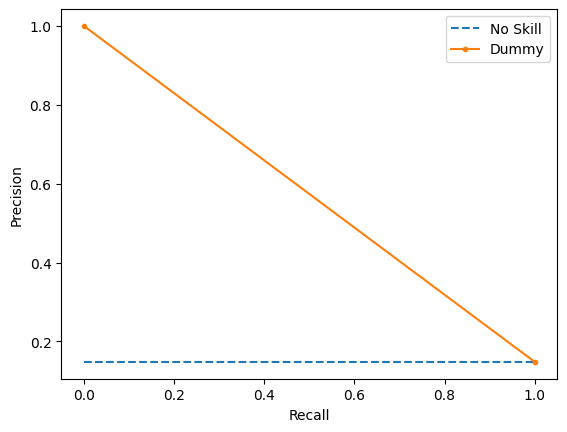

In [38]:
### dummy

## https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# precision-recall curve and f1

##################
## Obtention des df train, val, test
scaler = StandardScaler()
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
    scaler.fit_transform(dfXNum)
    , dfY)

trainX = X_train
testX = X_val
trainy = y_train
testy = y_val
##############

# fit a model
model = DummyClassifier(strategy= 'most_frequent')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Dummy: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
#no_skill = len(testy[testy==1]) / len(testy)
no_skill = testy.sum()/ len(testy)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Dummy')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

####

Le résultat du f1 (0) est cohérent vu que 0 signifie le pire score possible.

L'auc = 0.574, je ne comprends pas trop, je m'attendais à 0.5, comme dans le cas de la courbe ROC_AUC

"
The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
"

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html


####




####
Répétons l'exercice avec un autre classifier pour voir si on obtient un résultat meilleur qu'avec le dummy.

####

Logistic: f1=0.308 auc=0.446


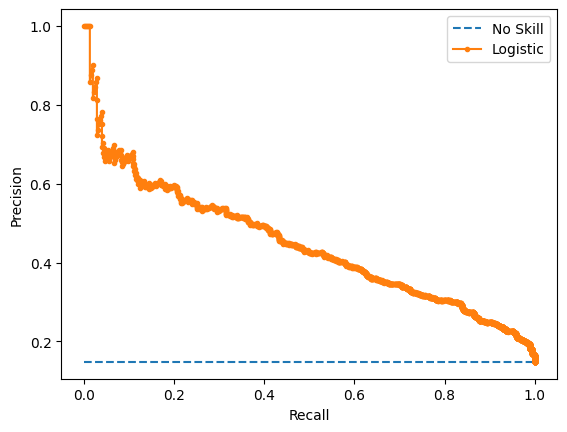

In [40]:
### logistic


##################
## Obtention des df train, val, test
scaler = StandardScaler()
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
    scaler.fit_transform(dfXNum)
    , dfY)

trainX = X_train
testX = X_val
trainy = y_train.values.ravel()
testy = y_val.values.ravel()
##############

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1 = f1_score(testy, yhat)
lr_auc = auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
#no_skill = len(testy[testy==1]) / len(testy)
no_skill = testy.sum()/ len(testy)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

####

Le f1 score (0.308) est meilleur que celui du dummy (0). C'est encourageant.

D'un autre côté, la courbe AUC est pire (0.446 vs 0.574).

Un peu d'investigation m'a amené à ceci: 

"
- high AUC ROC vs low f1 or other "point" metric, means that your classifier currently does a bad job, however you can find the threshold for which its score is actually pretty decent
- low AUC ROC and low f1 or other "point" metric, means that your classifier currently does a bad job, and even fitting a threshold will not change it
- high AUC ROC and high f1 or other "point" metric, means that your classifier currently does a decent job, and for many other values of threshold it would do the same
- low AUC ROC vs high f1 or other "point" metric, means that your classifier currently does a decent job, however for many other values of threshold - it is pretty bad

"


https://stackoverflow.com/questions/34698161/how-to-interpret-almost-perfect-accuracy-and-auc-roc-but-zero-f1-score-precisio


On est dans le 'low AUC vs high f1', ce que veut dire que le classificateur fait un travail décent (bon 0.308 est 'décent' en comparaison à 0.000), mais pour d'autre valeurs du threshold, c'est très mauvais.

Avant on avait un 'high AUC vs low f1', un mauvais classificateur (ce qui est normal pour un dummy 'most_frequent')

En considérant la métrique f1, on progresse.

NOTE: après coup, en faisant le score avec lr_f1 = f1_score(testy, yhat, average='weighted'), on obtient des scores très différents. Même celui du dummy s'élève à 0.78 (suprenant!) et celui de la  regression logistique à 0.83. On va voir dans les cellules suivantes ces résultats. De toute façon, le dummy obtient le pire score, comme attendu

####

## 3) Optimisation d'hyper-paramètres et utilisation de plusieurs modèles




###

In [41]:
## plot one precision recall
def plot_precision_recall(pYActual, pYPred, pLabel):
    precision, recall, thresholds = precision_recall_curve(pYActual, pYPred)
    #score = average_precision_score(pYActual, pYPred, average='weighted')
    score = f1_score(pYActual, pYPred, average='weighted')
    fig = plt.figure(4, figsize=(6,6))
    #plt.plot([0,1], [0, 1], 'k--')
    plt.plot(precision, recall, label=pLabel)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc='lower left')
    #plot_roc_curve(fpr, tpr)
    plt.show()
    

In [42]:
## precision recall curve
'''
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score
AP summarizes a precision-recall curve as the weighted mean of 
precisions achieved at each threshold
, with the increase in recall from the previous threshold used as 
the weight:
'''
## https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
def plot_multi_precision_recall(pDictResults, pPrintDebug=False):
    print ("--[plot_multi_precision_recall--")
    
    fig = plt.figure(4, figsize=(7,7))
       
    
    for key in pDictResults.keys():
        print("----------------------------")
        print("[key]: ", key)
        
        innerDict = pDictResults.get(key)
        y_actual = innerDict.get('y_actual')
        y_pred = innerDict.get('y_pred')
        
       

        precision, recall, thresholds = precision_recall_curve(y_actual, y_pred)
        
        score = f1_score(y_actual, y_pred, average='weighted')
        
        
        
        
        area_under_curve = auc(recall, precision)
        

        #plt.plot(recall, precision,label = key + " - [auc]: "+str(round(auc_precision_recall, 3)))
        plt.plot(recall, precision,label = key + " - [auc]: "+str(round(area_under_curve, 3)) + "- [f1] :"+str(round(score, 3)))
        #plt.plot(recall, precision,label = key + " - [f1_precision]: "+str(round(score, 3)))
        #plot_roc_curve(fpr, tpr, label=key)


    
    # axis labels
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc='lower left')
    
    plt.show() 


    

In [43]:
### dictionnaire avec les modèles à analyser
## 1) créer modèles
## 2) créer paramètres
## 3) ajouter au dicitonnaire

def getDictModels():
    ## baseline - dummy
    dummy_c = DummyClassifier()

    ## logistc regression
    log_r = LogisticRegression(solver='saga'
    , max_iter= 10^200
    #, penalty='elasticnet'
    , random_state=2023)

    ## knn
    model_knn = KNeighborsClassifier()

    ## decision tree
    model_decision_tree = DecisionTreeClassifier()

    ## extra tree
    model_extra_tree = ExtraTreesClassifier()

    ## random forest
    model_random_forest = RandomForestClassifier()


    ##bagging
    model_bagging = BaggingClassifier()

    ## gradient boosting
    model_gradient_boosting  = GradientBoostingClassifier()

    ##
    params_dummy = {'strategy' : ['most_frequent', 'prior']}

    ##
    params_log = {
      #'C' :[0, 0.01, 0.07, 0.1, 0.2 ,0.5, 0.7 , 1, 10, 100]
      'C' :loguniform(1e-5, 1e3)
    , 'l1_ratio': [0, 0.05, 0.1, 0.5, 1]
    #, 'penalty': ['l1', 'l2', 'elasticnet', 'none']
    #, 'penalty': ['l1', 'l2', 'elasticnet']
    , 'penalty': ['elasticnet']
    }

    ## knn
    params_knn = {'n_neighbors': [2,3,5,10,20], 'leaf_size':[10, 20, 30], 'p':[1,2,3]
    , 'metric': ['minkowski', 'euclidean', 'manhattan']
    , 'weights' : ['uniform', 'distance']
      }

    ## decision tree
    params_decision_tree = { 
      'criterion': ['gini', 'entropy']
      , 'ccp_alpha': loguniform(1e-3, 1e3)
      , 'max_depth': randint(2, 128)
    }

    ## extra_tree
    params_extra_tree = { 
      'criterion' : ['gini', 'entropy', 'log_loss']  
      , 'n_estimators': randint(1, 10^3)
      , 'min_samples_split' : randint(2, 10^5)
      , 'min_samples_leaf' : randint(1, 10^5)
      , 'max_features': ['sqrt', 'log2']
    }



    ## random forest
    params_random_forest = {
      'criterion' : ['gini', 'entropy', 'log_loss']  
      , 'n_estimators': randint(1, 10^3)
      , 'min_samples_split' : randint(2, 10^5)
      , 'min_samples_leaf' : randint(1, 10^5)
      , 'max_features': ['sqrt', 'log2']
    }

    ## bagging
    params_bagging = {
      'n_estimators': randint(1, 10^3)
    }

    ## params gradient boosting
    params_gradient_boosting = {
        'n_estimators' : randint(1, 10^3)
        , 'learning_rate' : loguniform(-8, 1)
        #, 'max_depth':  randint(1, 10^2)
        #, 'loss' : ['log_loss', 'deviance']
        #, 'max_features':  ['sqrt', 'log2']
        #, 'ccp_alpha' : loguniform(-6, 2)
    }


    ## dictionary containing models
    dictModels = {}


    dictModels.update({'dummy':{'model': dummy_c, 'params': params_dummy}})
    dictModels.update({'log':{'model':log_r, 'params':params_log}})
    dictModels.update({'knn': {'model':model_knn, 'params': params_knn}})
    dictModels.update({'decisionTree': {'model': model_decision_tree, 'params': params_decision_tree}})
    dictModels.update({'extraTree': {'model': model_extra_tree, 'params': params_extra_tree}})
    dictModels.update({'randomForest': {'model': model_random_forest, 'params': params_random_forest}})
    dictModels.update({'baggingClassifier': {'model': model_bagging, 'params': params_bagging}})
    #dictModels.update({'gradientBoosting': {'model': model_gradient_boosting, 'params': params_gradient_boosting}})
    
    return dictModels

In [44]:
def doClassificationAnalysis(pDfX, pScoring='recall'):
    ## Obtention des df train, val, test
    scaler = StandardScaler()
    X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
        scaler.fit_transform(pDfX)
        , dfY)

    ## récupérer dictionnaire de modèles à analyser
    dictModels = getDictModels()
    
    ## colonnes du dictionnaire interne
    lstKeysInnerDict=['model', 'params']

    ## dicionnaire de résultats
    dictResults = {}


    lstCols = ['train', 'pred']
    dfResultTrainPred = pd.DataFrame(columns = lstCols )

    ### scoring
    #scoringMethod='roc_auc'
    scoringMethod=pScoring
    #scoringMethod=[ 'roc_auc', 'recall'] 

    ## parcourir le dictionnaire de modèles et appliquer randomizedSearch
    ## pour trouver les meilleurs paramètres

    for key in dictModels.keys():
        #print("key: ", key)
        #print("value: ", dictModels.get(key))
        innerDict = dictModels.get(key)
        print ('-------------')
        model = innerDict.get('model')
        params = innerDict.get('params')
        print('[model]: ', model)
        print('[params]: ', params)

        #### randomized search
        #hyper_p_search = RandomizedSearchCV(model, params, cv=5, scoring=scoringMethod, n_iter = 5*10^2, random_state=2023)
        hyper_p_search = RandomizedSearchCV(model, params
                                        , cv=5
                                        , scoring=scoringMethod
                                        , n_iter = 1*10^2
                                        , random_state=2023)
        print(hyper_p_search.fit(X_train, y_train.values.ravel()))
        print("Best params: ", hyper_p_search.best_params_)
        print("Best score: ["+scoringMethod+"]:",  hyper_p_search.best_score_)
    
        if(type(model) == 'sklearn.linear_model.LogisticRegression'):
            y_train_pred = hyper_p_search.best_estimator_.predict_proba(X_train)[:, 1]
            y_val_pred = hyper_p_search.best_estimator_.predict_proba(X_val)[:, 1]
        else:
            y_train_pred = hyper_p_search.best_estimator_.predict(X_train)
            y_val_pred = hyper_p_search.best_estimator_.predict(X_val)
    
        #y_train_pred = hyper_p_search.best_estimator_.predict_proba(X_train)[:, 1]
        #y_val_pred = hyper_p_search.best_estimator_.predict_proba(X_val)[:, 1]
    
       
    
        
        score = f1_score(y_val, y_val_pred, average='weighted')
     
    

        #print('type(train): ', type(y_train))
        #print('type(train_pred): ', type(y_train_pred))

        

        #dictResults.update({key: {'y_actual': y_train, 'y_pred':y_train_pred, 'roc_auc_score':curr_roc_auc_score }})
        dictResults.update({key: {'y_actual': y_val, 'y_pred':y_val_pred, 'score':score }})
        print("len(dictResults): ", len(dictResults))
        
        
        plot_precision_recall(y_val, y_val_pred, pLabel = score)

    

  
    plot_multi_precision_recall(dictResults)


-------------
[model]:  DummyClassifier()
[params]:  {'strategy': ['most_frequent', 'prior']}
RandomizedSearchCV(cv=5, estimator=DummyClassifier(), n_iter=8,
                   param_distributions={'strategy': ['most_frequent', 'prior']},
                   random_state=2023, scoring='f1_weighted')
Best params:  {'strategy': 'most_frequent'}
Best score: [f1_weighted]: 0.7845184371026566
len(dictResults):  1


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=8. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


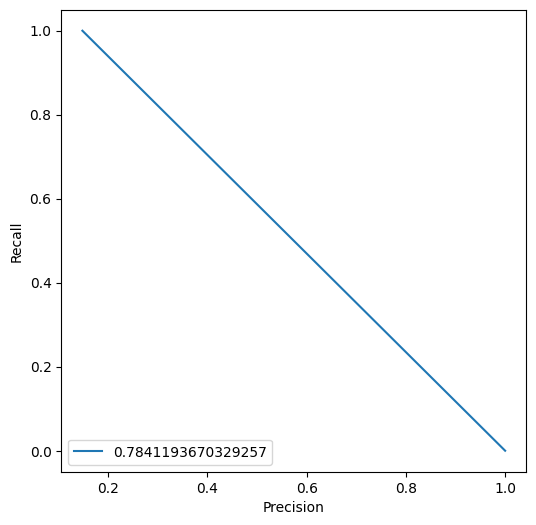

-------------
[model]:  LogisticRegression(max_iter=194, random_state=2023, solver='saga')
[params]:  {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f644de66320>, 'l1_ratio': [0, 0.05, 0.1, 0.5, 1], 'penalty': ['elasticnet']}
RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=194, random_state=2023,
                                                solver='saga'),
                   n_iter=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f644de66320>,
                                        'l1_ratio': [0, 0.05, 0.1, 0.5, 1],
                                        'penalty': ['elasticnet']},
                   random_state=2023, scoring='f1_weighted')
Best params:  {'C': 0.9599784834239673, 'l1_ratio': 0.5, 'penalty': 'elasticnet'}
Best score: [f1_weighted]: 0.8337028664163197
len(dictResults):  2


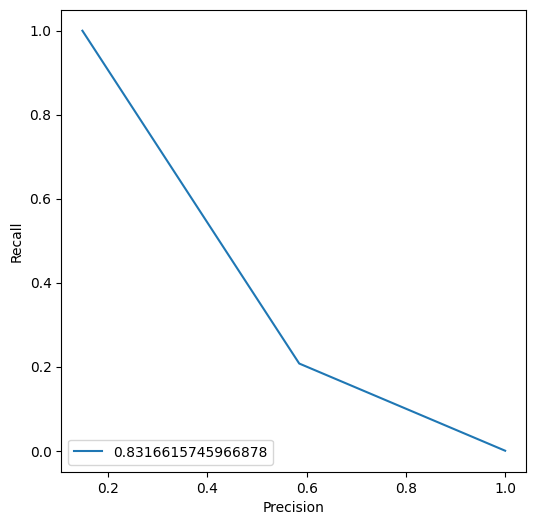

-------------
[model]:  KNeighborsClassifier()
[params]:  {'n_neighbors': [2, 3, 5, 10, 20], 'leaf_size': [10, 20, 30], 'p': [1, 2, 3], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}
RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=8,
                   param_distributions={'leaf_size': [10, 20, 30],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [2, 3, 5, 10, 20],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=2023, scoring='f1_weighted')
Best params:  {'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 30}
Best score: [f1_weighted]: 0.8222717546067194
len(dictResults):  3


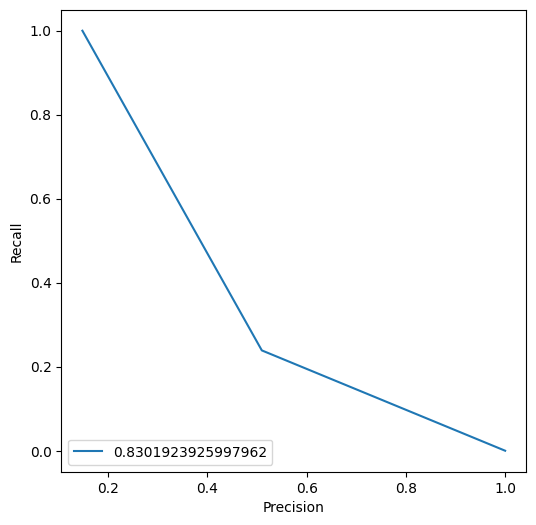

-------------
[model]:  DecisionTreeClassifier()
[params]:  {'criterion': ['gini', 'entropy'], 'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f644de65510>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de642b0>}
RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=8,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f644de65510>,
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de642b0>},
                   random_state=2023, scoring='f1_weighted')
Best params:  {'ccp_alpha': 0.007047698803985975, 'criterion': 'entropy', 'max_depth': 98}
Best score: [f1_weighted]: 0.805945423680312
len(dictResults):  4


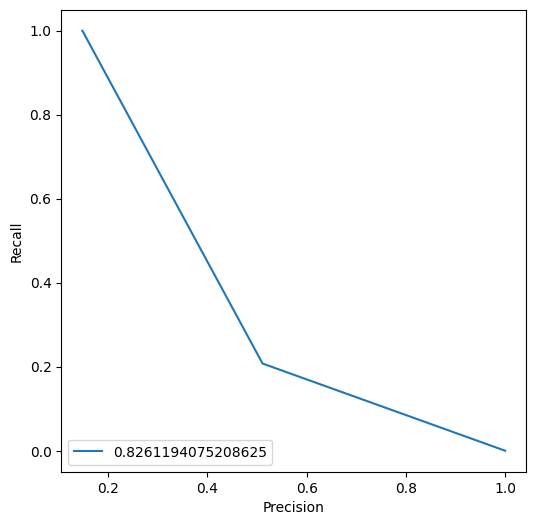

-------------
[model]:  ExtraTreesClassifier()
[params]:  {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de671f0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de64280>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de65cf0>, 'max_features': ['sqrt', 'log2']}
RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=8,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de65cf0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de642

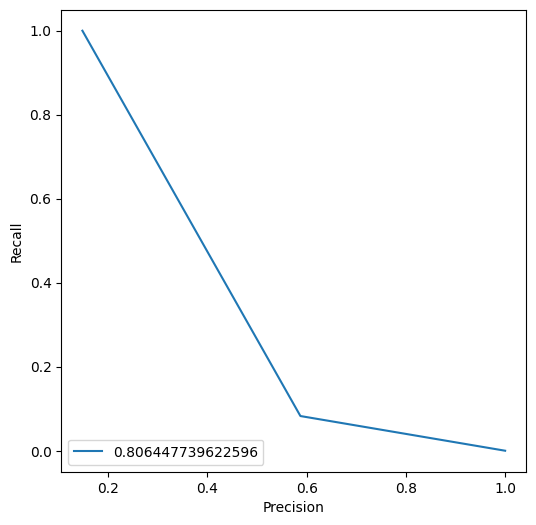

-------------
[model]:  RandomForestClassifier()
[params]:  {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de65300>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de643d0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de670a0>, 'max_features': ['sqrt', 'log2']}
RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=8,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de670a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644d

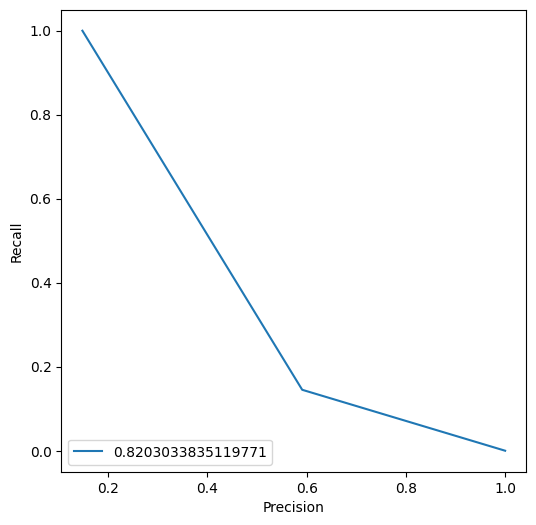

-------------
[model]:  BaggingClassifier()
[params]:  {'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de67b20>}
RandomizedSearchCV(cv=5, estimator=BaggingClassifier(), n_iter=8,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f644de67b20>},
                   random_state=2023, scoring='f1_weighted')
Best params:  {'n_estimators': 7}
Best score: [f1_weighted]: 0.8276373250323654
len(dictResults):  7


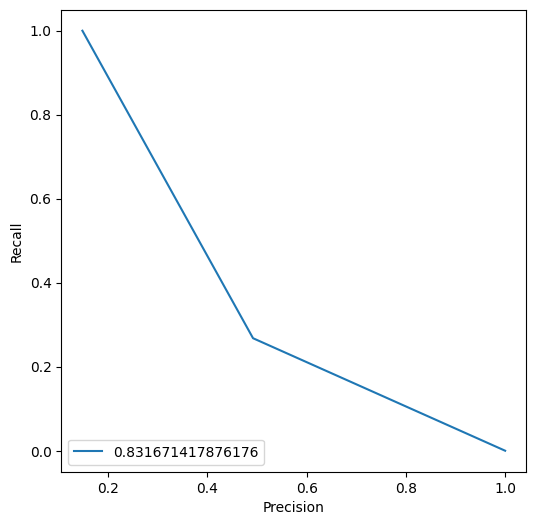

--[plot_multi_precision_recall--
----------------------------
[key]:  dummy
----------------------------
[key]:  log
----------------------------
[key]:  knn
----------------------------
[key]:  decisionTree
----------------------------
[key]:  extraTree
----------------------------
[key]:  randomForest
----------------------------
[key]:  baggingClassifier


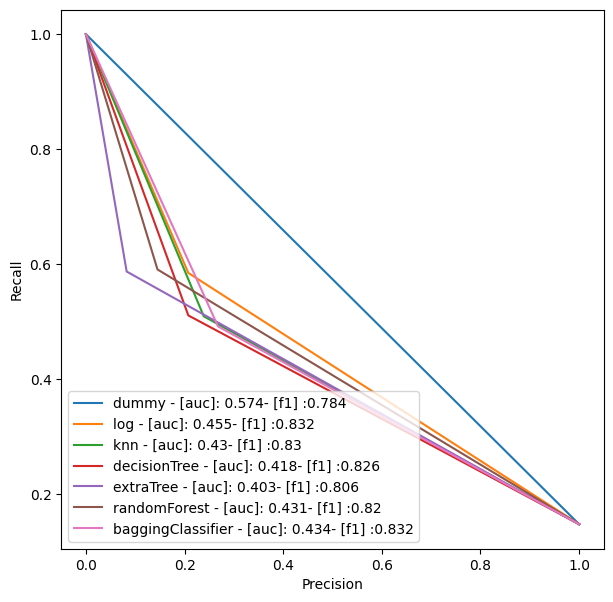

In [36]:
doClassificationAnalysis(dfXNum, pScoring='f1_weighted')

####

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

F1-score: the higher, the better. Max=1

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

####

In [187]:
sklearn.metrics.get_scorer_names() 

NameError: name 'sklearn' is not defined